In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# 定义可视化图像函数，输入图像路径，可视化图像
def show_img_from_path(img_path):
    '''opencv 读入图像，matplotlib 可视化格式为 RGB，因此需将 BGR 转 RGB，最后可视化出来'''
    img = cv2.imread(img_path)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

In [2]:
# 子豪兄训练得到的模型
!python translation_demo.py \
        /home/ivms/net_disk_project/19045845/dataclean/mmgeneration/results_cyclegan/cyclegan_lsgan_resnet_in_facades_b1x1_80k_vangogh2photo.py \
        /home/ivms/net_disk_project/19045845/dataclean/mmgeneration/results_cyclegan/best_is_iter_74000.pth \
        /home/ivms/net_disk_project/19045845/dataclean/mmgeneration/results_cyclegan/imgs/222.jpg \
        --target-domain vangogh \
        --save-path outputs/F4_photo2vangogh_1.jpg \
        --device cuda:0

/usr/local/python3/lib/python3.6/site-packages/mmcv/cnn/bricks/conv_module.py:151: UserWarning: Unnecessary conv bias before batch/instance norm
  'Unnecessary conv bias before batch/instance norm')
load checkpoint from local path: /home/ivms/net_disk_project/19045845/dataclean/mmgeneration/results_cyclegan/best_is_iter_74000.pth


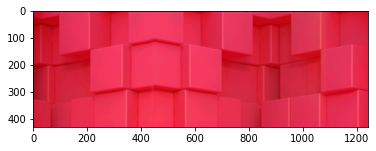

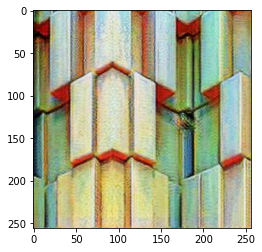

In [4]:
show_img_from_path('/home/ivms/net_disk_project/19045845/dataclean/mmgeneration/results_cyclegan/imgs/222.jpg')
show_img_from_path('/home/ivms/net_disk_project/19045845/dataclean/mmgeneration/results_cyclegan/F4_photo2vangogh_1.jpg')

## Python API方式调用

In [5]:
# 导入mmcv和mmgeneration
# import mmcv
from mmgen.apis import init_model, sample_img2img_model

# 导入 opencv
import cv2

# 导入numpy和matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# 照片转梵高

# 指定config文件路径
config_file = '/home/ivms/net_disk_project/19045845/dataclean/mmgeneration/results_cyclegan/cyclegan_lsgan_resnet_in_facades_b1x1_80k_vangogh2photo.py'

# 指定预训练模型权重文件路径
# checkpoint_file = 'work_dirs/experiments/cyclegan_vangogh2photo/ckpt/cyclegan_vangogh2photo/latest.pth'
checkpoint_file = '/home/ivms/net_disk_project/19045845/dataclean/mmgeneration/results_cyclegan/best_is_iter_74000.pth'

# 输出图像宽高像素尺寸
img_size = 256

In [9]:
model = init_model(config_file, checkpoint_file, device='cuda:0')

/usr/local/python3/lib/python3.6/site-packages/mmcv/cnn/bricks/conv_module.py:151: UserWarning: Unnecessary conv bias before batch/instance norm
  'Unnecessary conv bias before batch/instance norm')


load checkpoint from local path: /home/ivms/net_disk_project/19045845/dataclean/mmgeneration/results_cyclegan/best_is_iter_74000.pth


In [10]:
# 指定输入图像
input_path = '/home/ivms/net_disk_project/19045845/dataclean/mmgeneration/results_cyclegan/imgs/222.jpg'

# 读入输入图像，获取高宽尺寸
input_img = cv2.imread(input_path)

input_img.shape

(430, 1242, 3)

In [12]:
# 生成梵高油画，注意 target_domain 要设置正确
fake_imgs = sample_img2img_model(model, input_path, target_domain='vangogh')

In [13]:
fake_imgs.shape

torch.Size([1, 3, 256, 256])

In [14]:
# 获取生成图像尺寸
img_size = fake_imgs.shape[2]
img_size

256

In [15]:
# 分别抽取RGB三通道图像，归一化为0-255的uint8自然图像
RGB = np.zeros((img_size, img_size, 3))
RGB[:,:,0] = fake_imgs[0][2]
RGB[:,:,1] = fake_imgs[0][1]
RGB[:,:,2] = fake_imgs[0][0]

In [16]:
# 将生成图转为输入图像大小
RGB = cv2.resize(RGB, dsize=(input_img.shape[1],input_img.shape[0]))
# 像素值归一化
RGB = 255 * (RGB - RGB.min()) / (RGB.max()-RGB.min())
# 像素值转为整数
RGB = RGB.astype('uint8')

# 导出生成的图像文件
cv2.imwrite('outputs/F4_photo2vangogh.jpg', cv2.cvtColor(RGB, cv2.COLOR_BGR2RGB))

True

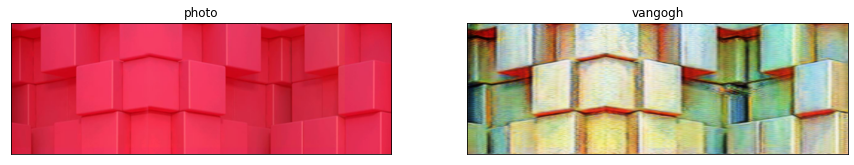

In [17]:
plt.figure(figsize=(15, 15))
# 展示原始输入图像
plt.subplot(1,2,1)
plt.title('photo')
input_RGB = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
plt.xticks([])
plt.yticks([])
plt.imshow(input_RGB)
    
# 展示生成图
plt.subplot(1,2,2)
plt.title('vangogh')
plt.xticks([])
plt.yticks([])
plt.imshow(RGB)

plt.show()

### 封装生成图像并可视化的函数

In [20]:
def gen_vis_fake_img(input_path, model, target_domain='vangogh', figsize=15, save_path='outputs/F4_photo2vangogh.jpg'):
    # 读入输入图像，获取高宽尺寸
    input_img = cv2.imread(input_path)
    # 生成梵高油画图像，注意 target_domain 要设置正确
    fake_imgs = sample_img2img_model(model, input_path, target_domain=target_domain)
    # 获取生成图像尺寸
    img_size = fake_imgs.shape[2]

    # 分别抽取RGB三通道图像，归一化为0-255的uint8自然图像
    RGB = np.zeros((img_size, img_size, 3))
    RGB[:,:,0] = fake_imgs[0][2]
    RGB[:,:,1] = fake_imgs[0][1]
    RGB[:,:,2] = fake_imgs[0][0]
    # 将生成图转为输入图像大小
    RGB = cv2.resize(RGB, dsize=(input_img.shape[1],input_img.shape[0]))
    # 像素值归一化
    RGB = 255 * (RGB - RGB.min()) / (RGB.max()-RGB.min())
    # 像素值转为整数
    RGB = RGB.astype('uint8')
    
    if save_path:
        # 导出生成的图像文件
        cv2.imwrite(save_path, cv2.cvtColor(RGB, cv2.COLOR_BGR2RGB))

    plt.figure(figsize=(figsize, figsize))
    # 展示原始输入图像
    plt.subplot(1,2,1)
    plt.title('input')
    input_RGB = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(input_RGB)

    # 展示生成图
    plt.subplot(1,2,2)
    plt.title(target_domain)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(RGB)

    plt.show()

In [ ]:
gen_vis_fake_img('/home/ivms/local_disk/MMGeneration_Tutorials-main/data/memory_san.jpg', model, figsize=20, save_path='outputs/F4_photo2vangogh.jpg')

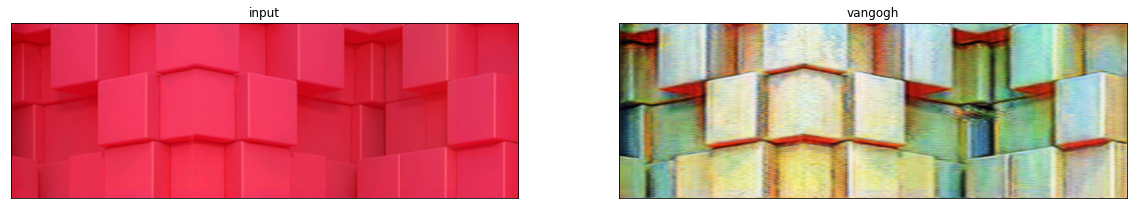

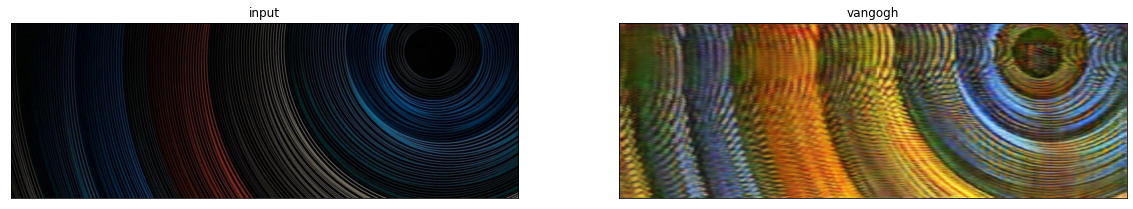

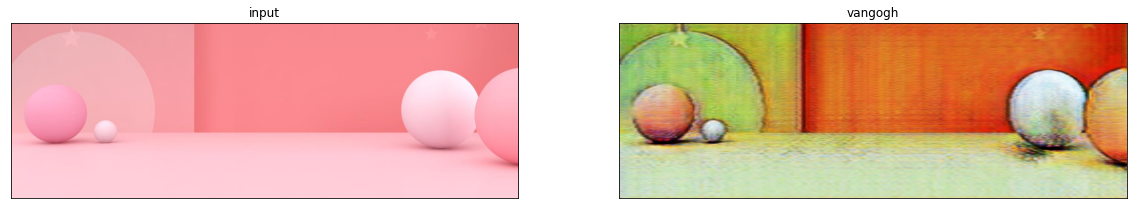

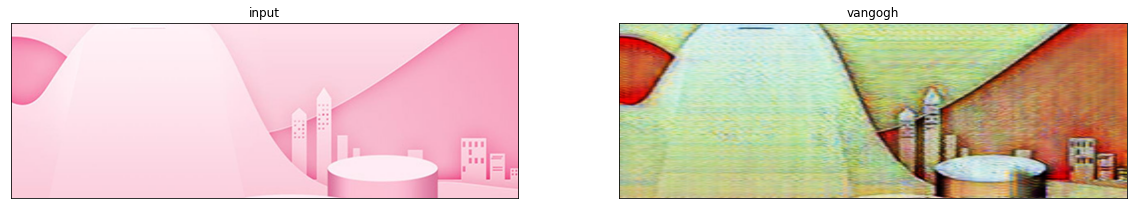

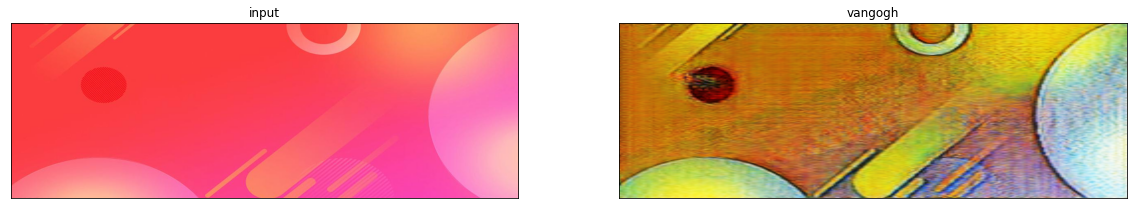

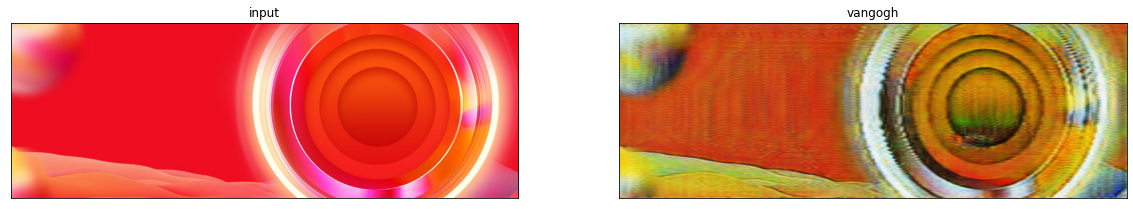

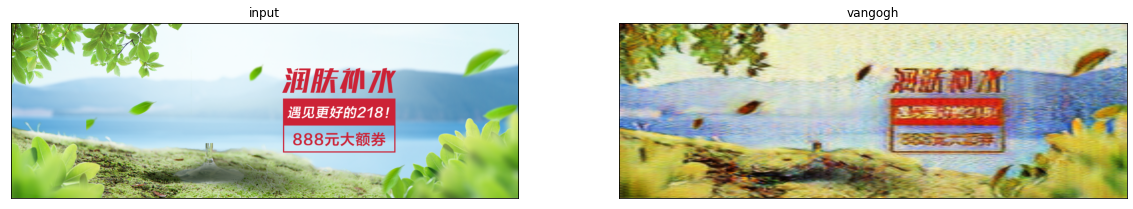

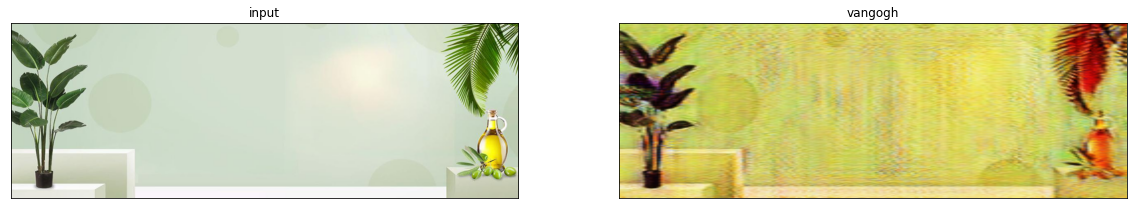

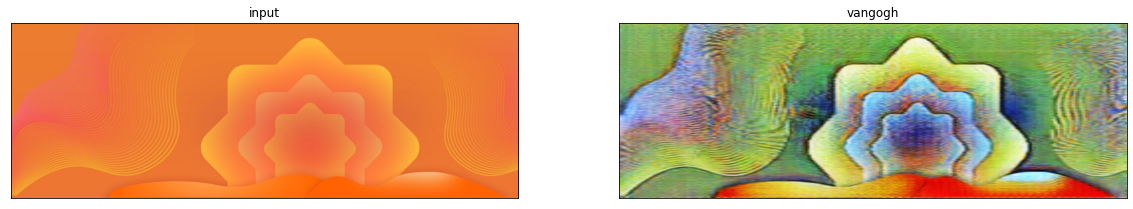

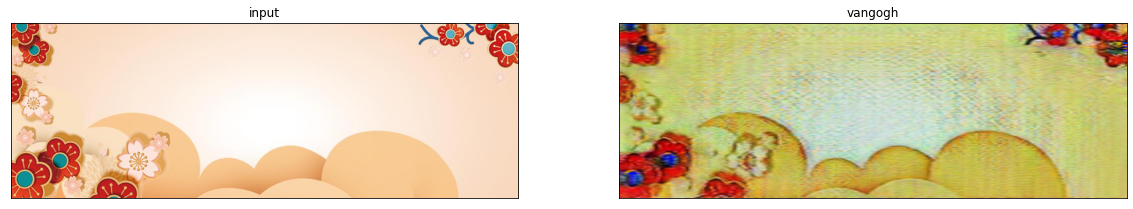

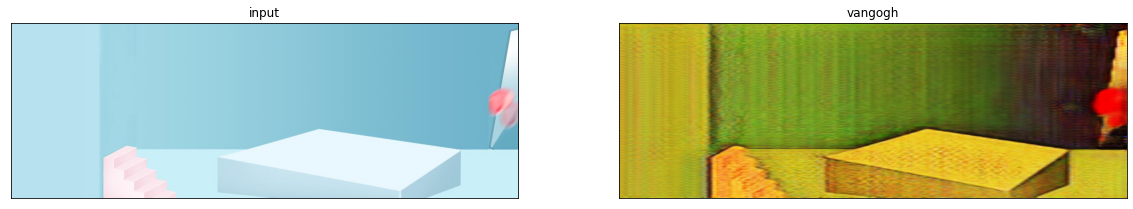

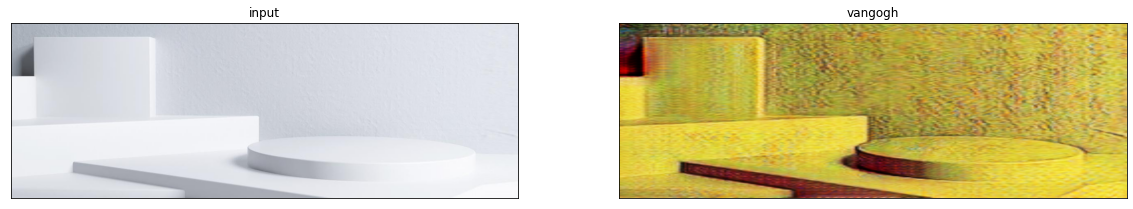

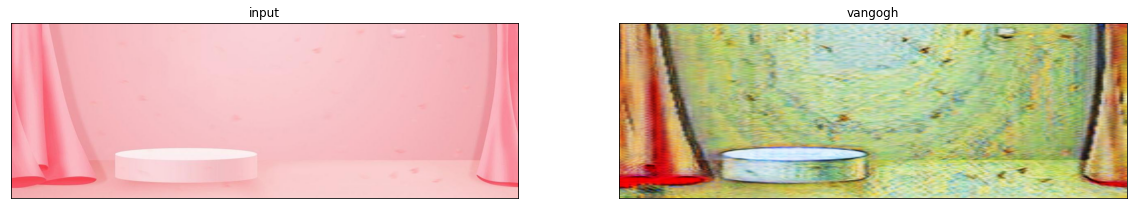

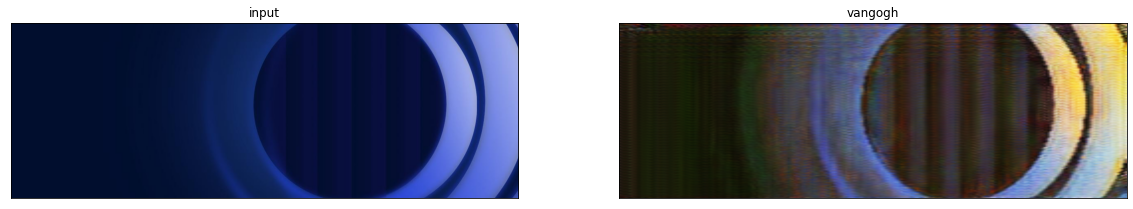

In [25]:
# 对文件夹中的每一张图像运行画作风格迁移
import os
photo_path = '/home/ivms/net_disk_project/19045845/dataclean/mmgeneration/results_cyclegan/imgs'
# os.chdir(photo_path)
for each in os.listdir(photo_path):
    each = os.path.join(photo_path,each)
    try:
        gen_vis_fake_img(each, model, target_domain='vangogh', figsize=20)
    except:
        pass
